Task #1
=======

All we've got is $\eta \sim \mathrm{Uni}(0,1)$.

In [67]:
#import some modeules first
import numpy as np
import scipy.stats as sps
import pandas as pd
import seaborn as sns
sns.set_theme()

***Goal***: $\xi_i \sim \mathrm{Bern}(p),\:i = 1,\dots,n$.  
***Implementation***: $\xi_i = \mathbb{I}(\eta < p) + \mathbb{I}(\eta \geqslant p)$

In [68]:
def gen_bernulli(p,size):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bern(p) """
    for i in range(size):
        if (sps.uniform.rvs() < p):
            yield 1
        else:
            yield 0
#end of gen_bernulli

print(list(gen_bernulli(0.5, 10))) 

[1, 1, 0, 1, 0, 0, 0, 1, 1, 1]


***Goal***: $\beta \sim \mathrm{Bin}(n,p)$  
***Implementation***: $\beta = \sum\limits_{i=1}^{n} \xi_i$.

In [69]:
def gen_binomial(n,p, size):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Bi(n,p) """
    for i in range(size):
        yield np.sum(np.array(list(gen_bernulli(p, n))))
#end of gen_binomial

print(list(gen_binomial(10,0.5, 10)))

[8, 3, 3, 7, 4, 6, 5, 3, 6, 4]


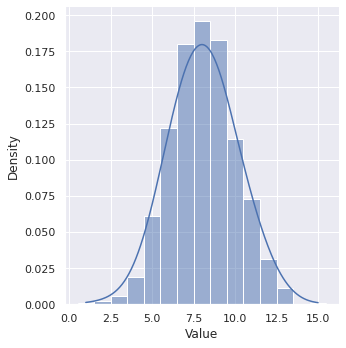

In [70]:
sample = list(gen_binomial(16,0.5, 1000))
df = pd.DataFrame({"Value": sample})
sns.displot(data=df, x="Value", discrete=True, stat="density",
                            kde=True, kde_kws={"bw_adjust": 2})

***Goal***: $\gamma \sim \mathrm{Geom}(p)$  
***Implementation***: $\gamma = \min\{i \in \mathbb{N} : \xi_i = 1\}.$

In [71]:
def gen_geometrical(p, size):
    """ Generates random sample [X1, X2,.. X_{size}] where Xi ~ Geom(p) """
    for i in range(size):
        out = 1
        while (next(gen_bernulli(p,1)) != 1):
            out+=1
        yield out
#end of gen_geometrical

print(list(gen_geometrical(0.5,5)))

[1, 5, 2, 2, 2]
